Demoing a color map

In [315]:
print(F"{np.pi/6:<.2f}")

0.52


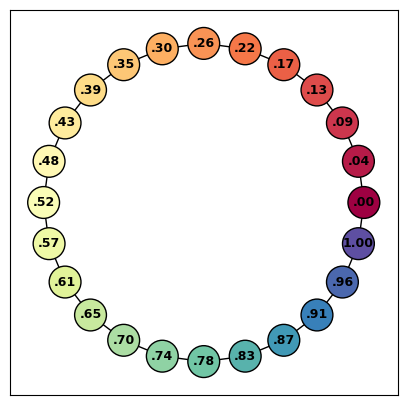

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np

def draw_color_spectrum (cmap,num_levels=24,figsize=(5,5),fontsize=9,
                         node_size=525,font_color="black"):
    ax,fig = plt.subplots(1,figsize=figsize)
    G = nx.cycle_graph(num_levels)
    # Layout algorithms often use a random initialization
    # Change the seed number until you find a layout you like and stick to it
    pos = nx.circular_layout(G)
    # Actual nodecolor floats
    nc = np.linspace(0,1,num_levels)
    # Create nx-mandated label dict.
    # Map numerical clor vals in [0,1] to formatted strings
    labels = {i:f"{nc[i]:.2f}".lstrip('0') for i in range(len(G))}
    #nx.draw(G, pos, node_color=nc, node_size=node_size, cmap=cmap,labels=labels,font_size=fontsize)
    
    colls=nx.draw_networkx_nodes(G, pos, node_size=node_size, cmap=cmap, node_color=nc)
    colls.set_edgecolor('black')
    # Choosing the custom drawing route.
    # Need to pass in a node label dict to get labels
    #dd = dict(zip(G0.nodes(),G.nodes()))
    nx.draw_networkx_labels(G, pos, font_size=fontsize,font_weight='bold',font_color=font_color,
                            labels=labels)
    nx.draw_networkx_edges(G,pos)
    #plt.show()
 


cmap = plt.cm.Spectral
draw_color_spectrum (cmap)

This color map does "ROYGBIV" (Red, Orange, Yellow, Blue, Indigo, Violet), the colors
of the spectrum.   Notice the values passed in are not integers but floats in the interval
[0,1], which are the kinds of values we'll be using in the pictures below. The picture displays integers corresponding to the 24 values passed in.  Lowest
value goes to red, highest to violet.

This next color map is the one used in the pictures below.  It is the reverse of
the `Spectral` map (`_r` means reverse).  Think Cold to Hot.  Violet is very cold, red is very hot, yellow is middling.  Moving from yellow to orange to red is moving from middling to very
hot.  Moving from violet to blue to green to yellow is moving up toward middling.

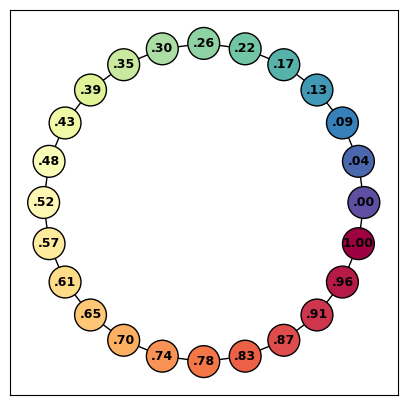

In [348]:
cmap=plt.cm.Spectral_r
draw_color_spectrum (cmap)

Here's a third color map, just to convey the idea that there are lots to chose from.
This moves from low saturation green to high saturation blue.

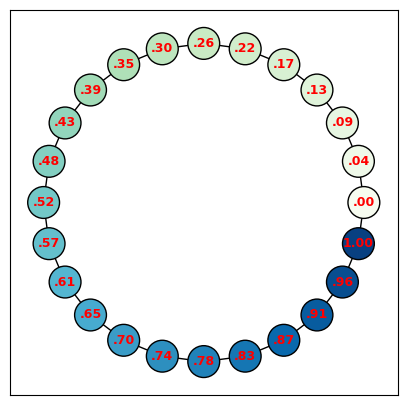

In [343]:
cmap=plt.cm.GnBu
draw_color_spectrum (cmap,font_color="red")

### Conceiving the code

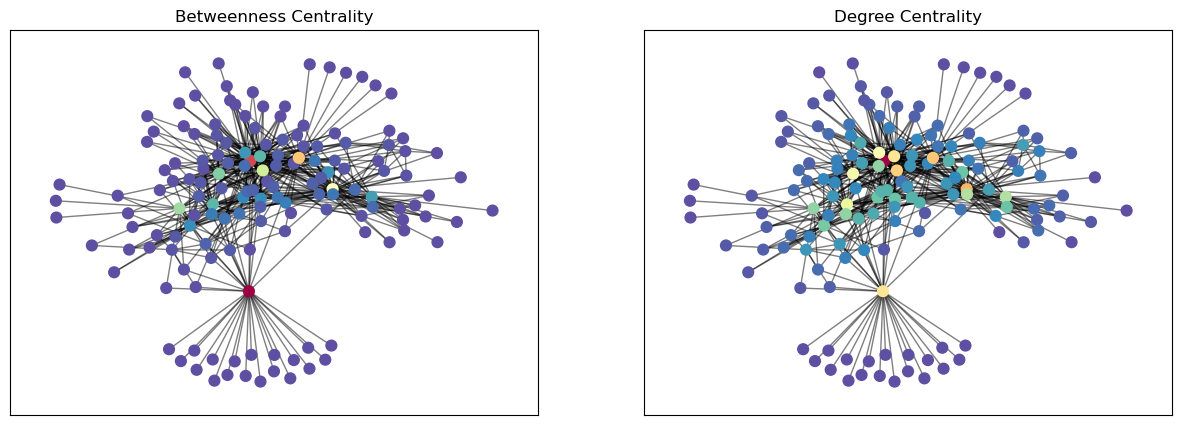

In [4]:
### import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


#######  Graph Choice ###########################################

##  Used by many of the randomly generated graphs, always optional
seed = 43

###. Pick a graph type with some randomness parameters
##. The truly random graphs dont develop much clique structure
#g0 = nx.fast_gnp_random_graph(150, .1, directed = False)
#seed, node_size, k_fac = 28, 70, .5
#g0 = nx.erdos_renyi_graph(150, .1, seed=seed)
# Next two HAVE Cliques but a little too predictably
#g0 = nx.ring_of_cliques(30, 5) # num cliques, size of cliques
#g0 = nx.connected_caveman_graph(30, 5)
# Not enough clique-yness for fun. Use newman_watts_strogatz instead
#g0 = nx.watts_strogatz_graph(150, 12, .1, seed=seed)
#seed, node_size, k_fac = 42, 70, .5
#g0 = nx.newman_watts_strogatz_graph(150, 12, .3, seed=seed)
##. The power law graphs all look alike.  Can get them to develop multiple hubs.  Why?
#g0 = nx.barabasi_albert_graph(250, 4, seed=seed)
# A lot like barabasi albert
#g0 = nx.powerlaw_cluster_graph(150, 12, .3, seed)
# Random lobster is kind of cool big diffs between deg cent and between cent.
#g0 = nx.random_lobster(150, .6, .3, seed=seed)
# Very  cute but very archipelago-like
#g0 = nx.random_powerlaw_tree(150,seed=seed, tries=1000)

# Clearest example of diffs between deg cent and betweenness cent.
# because 1st arg is the [fixed] degree of all the nodes, 2nd is N.
#g0 = nx.random_regular_graph(10, 150, seed)
#g0 = nx.connected_watts_strogatz_graph(150, 12, .3, seed=seed)

# Also has bigger diffs betwesn betweenness and degree pictures
#seed,node_size, k_fac  = 12, 50, .25
#g0 = nx.random_geometric_graph(150, 0.225)
# Very interesting biologically inspired network
#41


g0 = nx.duplication_divergence_graph(150, .5, seed)

##################################################################
########  Cast Centrality Vals as Node-aligned List ##############
##################################################################
###### centrality values compiuted as node -> val dict()
betweenness = nx.betweenness_centrality(g0)
degree = nx.degree_centrality(g0)
#  Align dict values with nextworx's internally stored node sequence
betweenness_colors = [betweenness[n] for n in g0.nodes()]
degree_colors = [degree[n] for n in g0.nodes()]
##### End Centrality Vals ###################################

##################################################################
##
##  P l o t t i n g       C o d e
##
##################################################################

# Plotting params

node_size, k_fac  = 60, .5  
# transparency of edges [lower = more transparent]
edge_alpha = .5
node_alpha=1.0
# optimal distance between nodes; increase  to spread nodes out
# default: k = 1/np.sqrt(len(g0))
k = k_fac/np.sqrt(len(g0))
#######. The all-important choice of a color map!
# dir(plt.cm) for a list of all colormaps
# https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html
# for a fairly abstruse discussion of how to choose a colormap
#map=plt.cm.inferno
#cmap=plt.cm.nipy_spectral
# My fav; used below
cmap=plt.cm.Spectral_r
# Seems to lose some of the contrasts
#cmap = plt.cm.RdYlBu
# Still loses contrasts
#cmap = plt.cm.coolwarm
# Loses a lot of contrast
#cmap=plt.cm.GnBu
# Not clear this makes much diff
scale = .3

# Subplots configuration; will vary with number of centrality measures used
fig, axs = plt.subplots(1, 2,figsize = (15,5))
# Layout [same for both plots]
# using seed to get same layout each time the NB is run.
pos=nx.spring_layout(g0,scale=scale, k = k,seed=seed)

# Draw plot 0 for first centrality measure
ax = axs[0]
ax.set_title('Betweenness Centrality')
nx.draw_networkx_nodes(g0, pos, node_color=betweenness_colors, node_size=node_size,
                       cmap=cmap, ax =ax,alpha=node_alpha)
nx.draw_networkx_edges(g0, pos, alpha=edge_alpha,ax = ax)
# End Draw plot 0

# Draw plot 1 for second centrality measure
ax = axs[1]
ax.set_title('Degree Centrality')
nx.draw_networkx_nodes(g0, pos, node_color=degree_colors, node_size=node_size,
                       cmap=cmap, ax = ax)
nx.draw_networkx_edges(g0, pos, alpha=edge_alpha, ax = ax)
# End Draw plot 1

## Organizing it

In [1]:

import numpy as np
import networkx as nx
import igraph as ig
from igraph.drawing.colors import hsva_to_rgba
import random
import matplotlib as mpl
import matplotlib.pyplot as plt

alpha_cms= [nx.pagerank, nx.katz_centrality]
spectral_cms= [nx.eigenvector_centrality] + alpha_cms

def make_value_dict (G, centrality_measures,transform=lambda x:x,
                    normalize=False,alpha=None, max_iter=100,verbose=False):
    """
    Given graph G and a list of graph centrality measure fns (networkx),
    return a dictionary whose keys are the name strings of the
    functions in centrality measures, 
    and whose value for any given cm is a list of the cm-centrality scores 
    for each node in G.
    
    This is for passing centrality scores as color choices in networkx draw_nodes (nx)
    nx supports using a color map to map floats to colors, but it has to
    be a list of floats (one for each node) aligned with the node ordering of G.
    
    0< color_spread <=1: power to raise color floats to; in the interval [0,1).
    Smaller means increasing spread of colors.
    
    assuming nodes are 0-based indexes of the sort returned by range(n)
    """
    value_dict = dict()
    size = len(G)
    for cm in centrality_measures:
        if verbose:
            print(title_from_fn(cm))
        ###  Get centrality values
        cm_name = title_from_fn(cm)
        try:
            if cm in alpha_cms and alpha is not None:
                v_dict = cm(G,max_iter=max_iter,alpha=alpha)
            elif cm in spectral_cms:
                v_dict = cm(G,max_iter=max_iter)
            else:
                v_dict = cm(G)
        except nx.PowerIterationFailedConvergence:
              print(cm_name, nx.PowerIterationFailedConvergence.__name__)
              value_dict[cm_name] = np.zeros(size)
              continue
        ### Transform centrality values, handling hub, authority case; get 
        ##  centrality measure name (cm_name)
        if isinstance(v_dict,tuple) and cm_name == 'Hits':
            h = transform(np.array([v_dict[0][i] for i in range(len(G))]))
            a = transform(np.array([v_dict[1][i] for i in range(len(G))]))
            cm_name,cm_name2 = 'Hub','Authority'
        elif isinstance(v_dict,tuple):
            raise Exception(f"{cm_name} returns Tuple. Only implemented Centrality Measure that does this is Hits.")
        else:
            h = transform(np.array([v_dict[i] for i in range(len(G))]))
            a = None
            cm_name, cm_name2 = cm_name,None
        if normalize:
            # Normalize centrality values => adj(usted) vals
            adj_hvals = (h - h.min())/(h.max()-h.min())
            if a is not None:
                adj_avals = (a - a.min())/(a.max()-a.min())
            else:
                adj_avals = None
        else:
            adj_hvals,adj_avals = h,a
        # Enter results into value dict under proper label
        value_dict[cm_name] = adj_hvals
        if adj_avals is not None:
            value_dict[cm_name2] = adj_avals
    return value_dict
 
def title_from_fn (fn, split_char = '_'):
    """
    `fn` is a function instance: find its name string, turn it into capitalized string
    of words.  Finds words in function's name by using `split_char` (default val "_")
    """
    return ' '.join(fn.__name__.split(split_char)).title()

def plot_centrality_measures (G, centrality_measures,transform=lambda x:x,
                              normalize=False, vertex_color_opacity=1,
                             max_iter=100,edge_alpha=.5,pos=None, add_colorbar=False):
    global ax
    v_dict = make_value_dict(G, centrality_measures,transform=transform,normalize=normalize,
                             max_iter=max_iter)
    # Display config always 2 cols
    rows, cols = len(v_dict)//2, 2
    fig, axs = plt.subplots(rows, cols, figsize = (15,5*rows))
    # Flatten axs so we can access an ax with a single index
    axs = np.ravel(axs)
    max_idx = len(axs)-1
    # End Display config

    # Layout [crucially, the same for all n plots]
    # scale seems to be unneeded (because k is being used?)
    # pos=nx.spring_layout(G, scale=scale, k = k, seed=seed)
    if pos is None:
        pos=nx.spring_layout(G, k = k, seed=seed)
    #v_dict = make_value_dict(G, centrality_measures,transform=transform,normalize=normalize,
    #                        max_iter=max_iter)
    for (i,centrality_measure) in enumerate(v_dict.keys()):
        ax = axs[i]
        ax.set_title(centrality_measure)
        vals = v_dict[centrality_measure]
        # The next two lines dont work but boy are the pretty
        # Cant use colorbars with a true scatterplot 
        #norm = mpl.colors.Normalize(vmin=vals.min(), vmax=vals.max())
        #fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
        #             cax=ax, orientation='vertical')
        collections = nx.draw_networkx_nodes(g0, pos, node_color=vals, 
                                             node_size=node_size,
                                             cmap=cmap, 
                                             ax=ax,
                                             alpha=vertex_color_opacity)
        #if add_colorbar and i == max_idx:
        #   norm = mpl.colors.Normalize(vmin=vals.min(), vmax=vals.max())
        #    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation="horizontal")
        # We're adding a black border to the vertices (No keyword arg for this)
        # The motivation here is to get the node colors to stand out more
        collections.set_edgecolor('k')
        #ax.collections[0].set_edgecolor("k") 
        nx.draw_networkx_edges(g0, pos, alpha=edge_alpha, ax = ax)
    if add_colorbar:
        #fig.subplots_adjust(right=0.8)
        #cbar_ax = fig.add_axes([0.85, 0.13, 0.05, 0.72])
        norm = mpl.colors.Normalize(vmin=0, vmax=1)
        #plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation="vertical")
        fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs.ravel().tolist())
    return v_dict,pos
        
def ig_plot_centrality_measures (G, centrality_measures,transform=lambda x:x,
                                 normalize=False, margin=10, seed=47, 
                                 vertex_color_opacity=1):
    """
    igraph version which currently seems to look better with normaliztion.
    Exact reason for why the color scome out so diferent is unknown.
    """
    global v_dict,lbls,IG,cmap,centrality_measure,v_dict
  
    IG = ig.Graph.from_networkx(G)
    random.seed(seed)
    # Layout same for all plots
    pos = IG.layout_fruchterman_reingold()
    # Display config always 2 cols
    rows, cols = len(centrality_measures)//2, 2
    fig, axs = plt.subplots(rows, cols, figsize = (15,5*rows))
    
    # Flatten axs so we can access an ax with a single index
    axs = np.ravel(axs)
    # End Display config

    v_dict = make_value_dict(G, centrality_measures,transform=transform,
                             normalize=normalize)
    visual_style = {}
    visual_style["vertex_size"] = 1
    
    #visual_style["vertex_label"] = g.vs["name"]
    visual_style["edge_width"] = [1 for e in IG.es]
    visual_style["layout"] = pos
    visual_style["bbox"] = (300, 300)
    visual_style["margin"] = margin
    
    ig.plot(IG, **visual_style)
    
   
    for (i,centrality_measure) in enumerate(v_dict.keys()):
        ax = axs[i]
        ax.set_title(centrality_measure)
        lbls = IG.vs['_nx_name']
        #cols = [wrap_cmap(v_dict[centrality_measure][lbls[i]],cmap) 
        #       for (i,v) in enumerate(IG.vs)]
        vals = v_dict[centrality_measure]
        cols0 = cmap(vals,alpha=vertex_color_opacity)
        # the igraph folks want rgba tuples; give 'em tuples
        cols = [tuple(rgba_val) for rgba_val in cols0]
        IG.vs['color'] = cols
        # we have to use matplotlib (rather than cairo) to employ the matplotlib axes,
        # so igraph vis is not at its best
        visual_style['target'] =ax
        ig.plot(IG,**visual_style)       

### A useful picture

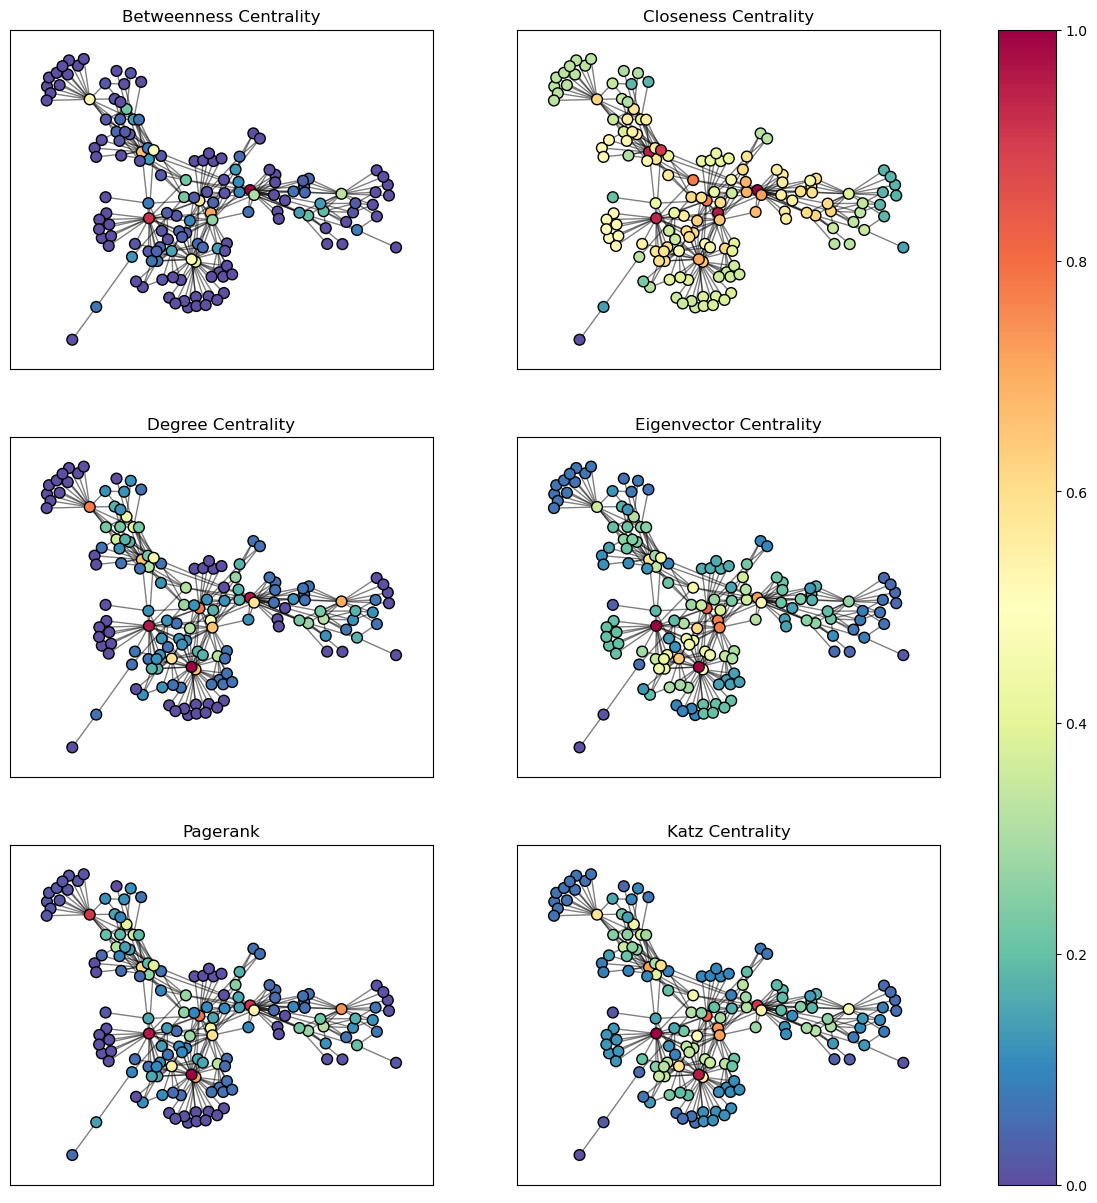

In [2]:
import matplotlib.pyplot as plt

alpha = .3
cmap=plt.cm.Spectral_r
#scale = .3

# params apprpriate for this graph type
seed,node_size, k_fac  = 41, 60, .5  
g0 = nx.duplication_divergence_graph(150, .5, seed)

#seed, node_size, k_fac = 42, 70, .5
#g0 = nx.newman_watts_strogatz_graph(150, 12, .3, seed=seed)

k = k_fac/np.sqrt(len(g0))

centrality_measures = [nx.betweenness_centrality, nx.closeness_centrality, 
                       nx.degree_centrality, nx.eigenvector_centrality,
                        nx.pagerank, nx.katz_centrality
                      ]

transform = (lambda x: x**.8)
normalize = False
#transform = (lambda x: x)
#transform = np.exp
v_dict,pos = plot_centrality_measures (g0, centrality_measures,transform=transform,
                                       normalize=normalize, vertex_color_opacity=1,add_colorbar=True)
   

The Max and Min color values are 1.0 and 0.0. For this cold-to-hot color map, Violet (V) = 0, Red (R) = 1.0. 
Ordering: VIBGYOR.

Note the purple fringes in the first column. The centrality values generally agree with the layout. Peripherality in the layout means low centrality values, especially with betweenness centrality. Note the shared red nodes at the
center of clusters. All these first column measures are rewarding being a high degree node that connects lots of others.  Compare the transition from
degree centrality (dc) to eigenvector centrality (ec).  
Not all the nodes that red for dc remain red for ec.  
Some high-degree nodes are connected to less important
nodes. Peripherality isn't penalized as much if a peripheral low degree node is connected
to a high degree node.  This is consistent with the motivating principle
for ec.  This also means low ec doesn't always agree with layout peripherality.

#### Just the spectral measures

These are the measures having something to do with the egenvectors and eigenvalues of the
adjacency matrix $A$, or a closely related matrix $AD^{-1}$.

What may be somewhat surprising here is teh inclusion of degree centrality, which
can certainly be computed without using anything as exotic as an eigenvector.
We discuss this point below.

In [252]:
node_size

50

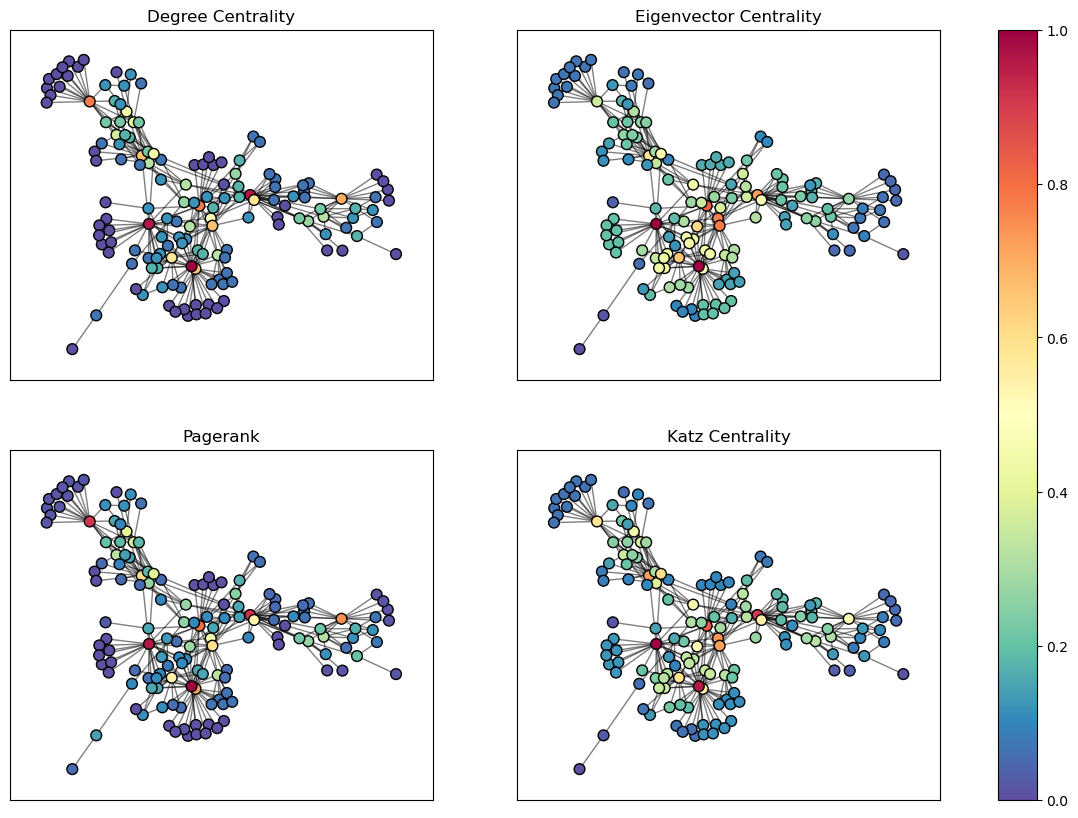

In [3]:
centrality_measures0 = [nx.degree_centrality, nx.eigenvector_centrality,
                        nx.pagerank, nx.katz_centrality
                      ]
seed=41
v_dict,pos = plot_centrality_measures (g0, centrality_measures0,transform=transform,
                                       vertex_color_opacity=1,normalize=False,
                                         max_iter=100,add_colorbar=True)

Why you may (or may not want to try normalizing: map all measures onto a single scale).

In [248]:
for (cm,vals) in v_dict.items():
    print(f"{cm:<25} {vals.min():.3f} {vals.max():.3f}")

Degree Centrality         0.286 0.634
Eigenvector Centrality    0.114 0.758
Pagerank                  0.219 0.446
Katz Centrality           0.419 0.706


Let's look at the correlations of the centrality measures.

In [4]:
import seaborn as sn
import pandas as pd
#import matplotlib.pyplot as plt
seed,node_size, k_fac  = 41, 50, .5  
g0 = nx.duplication_divergence_graph(150, .5, seed)

v_dict = make_value_dict (g0, centrality_measures0)
df = pd.DataFrame(v_dict)
cm_corr = df.corr()
cm_corr.style.background_gradient(cmap='coolwarm')

,Degree Centrality,Eigenvector Centrality,Pagerank,Katz Centrality
Degree Centrality,1.000000,0.821206,0.993032,0.940033
Eigenvector Centrality,0.821206,1.000000,0.785784,0.950938
Pagerank,0.993032,0.785784,1.000000,0.909965
Katz Centrality,0.940033,0.950938,0.909965,1.000000


Note.  The 4 spectral measures (having some relationship to Eigenvalues and Eigenvectors)
separate into two pairs when we look at the correlation matrix.  Degree Centrality is
**strongly** correlated with Pagerank(.99); Eigenvector Centrality is almost as strongly
correlated with Katz Centrality (.95).  .

Let's look at these points relate to the  basic equation defining each centrality measure:

$$
\begin{array}[t]{l|l|l}
\hline
    & \hspace{1em}\text{Measure} &  \hspace{3em}x_{i}\\
    \hline
(a) & \text{Eigenvector Centrality} & \alpha\sum_{j} A_{ij} x_{j}  \\
(b) & \text{Katz Centrality} & \alpha \sum_{j} A_{ij} x_{j}  +{\mathbf 1} \\
(c) & \text{Degree Centrality} & \alpha \sum_{j} A_{ij} \frac{x_{j}}{k^{out}_{j}}  \\
(d) & \text{Pagerank Centrality} & \alpha \sum_{j} A_{ij} \frac{x_{j}}{k^{out}_{j}}  +{\mathbf 1} \\
\end{array}
$$
Degree and Centrality and Pagerank (.99 correlation) share the property of degree normalization
(dividing by $k^{out}_{j}$, we define this more precisely below).  The second pair shares the property of adding 
centrality values for each node (we have used the vector ${\mathbf 1}$ for this).

All 4 measures compute the centrality of vertex $i$
by summing the centralities of its neighbors $j$.
The last two measures divide the centralities values contributed to $i$ by
each connected vertex $j$ by the degree of $j$. This is what
we refer to as degree normalization.
Measures (b) and (d) add an initial  centrality value for each node (this
is the role of $+ {\mathbf 1}$). 

The equivalence of (c) to degree centrality holds only for undirected graphs, where
expression (c) converges on  a leading eigenvector $v^{1}$ of $AD^{-1}$,
where $D^{-1}$ is the inverse of the diagonal degree matrix $D$ ($D_{ii} = k_{i}$).
It can be shown that $v^{1}_{i} = k_{i}$,
the degree of vertex $i$.  The corresponding eigenvalue is 1.

These considerations, discussed in Newman (2003), motivate the following
way of classifying the four spectral centralities.

$$
\begin{array}[t]{l|ll}
         & \text{Initialize Values} & \text{Don't initialize} \\
\hline
\text{Normalize} &  \text{Pagerank} & \text{Degree Centrality}\\
\text{No normalizing} & \text{Katz Centrality} & \text{Eigenvector Centrality}\\
\hline
\end{array}
$$

So the correlations we saw hold between the two normalizing measures (.99) 
and the two nonnormalizing measures (.95).  In other words, adding ${\mathbf 1}$
doesn't seem to change the discriminations a centrality measure makes by very much.
Of course all this is undoubtedly tied to the kinds of graphs we are using.

### Igraph version

The colors come out different in `igraph`.  Don't know why.  As far as I can tell,
the same rgba values are used as in the `draw_networkx_nodes` version above; the uncertainty
is that in the picture above, `draw_networkx_nodes` is handling the application of the color
map to the values, and the `networkx` source code shows that the color mapping is passed off
to `matplotlib.scatter` whiuch has node color and color map parameters.

So I can't actually check the matplotlib rgba values
without diving into the `matplotlib` source.  In `igraph`
the colors rendered are almost all in the BIV region of of ROYGBIV.  None
of the value transforms I've tried are much help; the 4th root transform shown
below yields a small improvement.

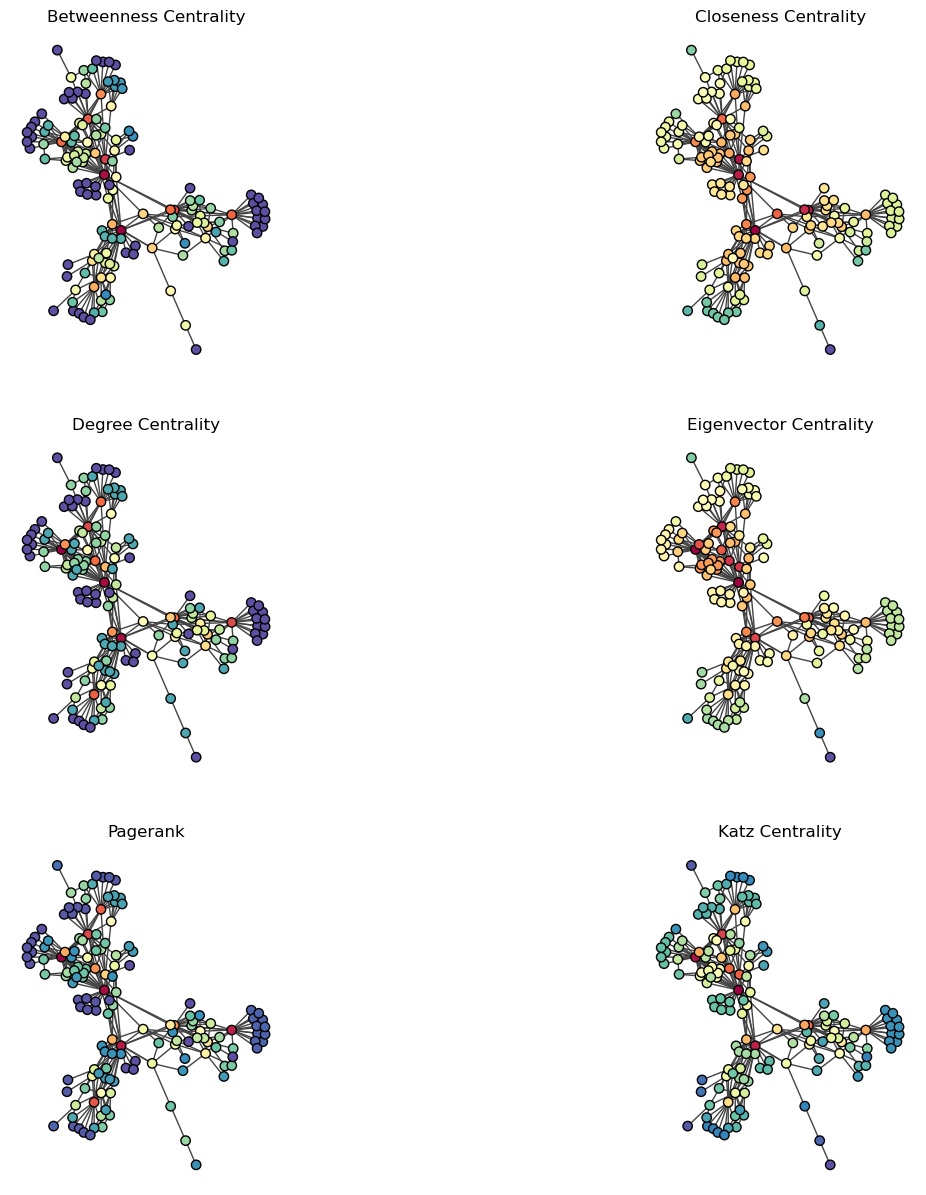

In [259]:
transform = (lambda x:x**.25)
#transform = np.exp
# Color map VIBGYOR
# To facilitate comparison, we make sure g0 is the same duplication divergence garph used above
seed,node_size, k_fac  = 41, 50, .5  
g0 = nx.duplication_divergence_graph(150, .5, seed)
# Using normalize=True helps
ig_plot_centrality_measures (g0, centrality_measures,transform=transform,seed=49,
                            vertex_color_opacity=1,normalize=True)

#### Other Graph Types

Some additional code discussed below.

In [6]:
import math

def katz_centrality0(G, max_iter=100, alpha=.15, beta=1.0, 
                                       personalization=None, verbose=0):
    A = nx.to_numpy_array(G)
    return katz_centrality_adjacency(A,max_iter,alpha,beta,personalization,verbose)

def katz_centrality_adjacency(A, power, alpha=.85, beta=1.0, 
                           personalization=None, verbose=0):
    """
    This version is being used to circumvent a problem
    with nx.katx_centrality, which raises PowerIterationFailedConvergence(max_iter)
    errors on random graphs created with nx.fast_gnp_random_graph for valus of
    max_iter as high as 10_000. The value of alphan may play a role too.
    This version doesnt, but it also doesnt check for convergence,
    so it's not clear it solves anything.  But it serves the
    purposes of this notebook.
    """
    (n,m) = A.shape
    assert n == m, "Only square arrays allowed!"
    if personalization is None:
        personalization = np.ones(n)
    One = beta * personalization
    x = np.zeros(n)
    check_every_n = math.floor(power/10)
    for i in range(power):
        if verbose and (i+1)%check_every_n == 0:
            print(f"Vertex {x.argmax()}: {math.floor(x.max()):>9,}")
        x = (alpha * (x@A)) + One
    return x



Let's look at additional graph types.

In [7]:
import pandas as pd
#  If you want an approximation of katz centrality even when there are
#   power convergence failures (for example with nx.fast_gnp_random_graph), 
#  use katz_centrality0, which basically 
#  just returns unconverged (diverging) results.
centrality_measures0 = [
                        nx.degree_centrality, 
                        nx.pagerank, 
                        nx.eigenvector_centrality,
                        #nx.katz_centrality,  
                        katz_centrality0,  
                       ]


max_iter = 100
k_fac = .5

############################################################################
#
#   M a k e    a     G r a p h
#
############################################################################

# To get a different random graph of same type, change these params
seed = 41
N = 150
p= .1

# Where this matters it slows things down.
directed = True
#Display param: Try larger values for some graph types.   default = .5
edge_alpha =.1
# layout param
k = k_fac/np.sqrt(N)

##  Various graph types to try
# The graph used in the beginning of the notebook
# we hard-coded p = .5
#g0 = nx.duplication_divergence_graph(N, .5, seed)
# use katz_centrality0
g0 = nx.fast_gnp_random_graph(N, p, directed = directed)
#g0 = nx.watts_strogatz_graph(N, 12, p, seed=seed)
# hard coding p = .3
#g0 = nx.random_lobster(150, .6, .3, seed=seed)
#g0 = nx.random_powerlaw_tree(150,seed=seed, tries=1000)
# Be sure to try this one.  Nice pictures; uses katz_centrality0 in place of nx.katz_centrality.
# increasing prob means decreasing edge_alpha
# hard-coding p = .325
#g0 = nx.random_geometric_graph(N, 0.325,seed=seed)

############################################################################
#
#   M a k e / D i s p l a y    t h e    C o r r e l a t i o n   M a t r i x
#
############################################################################

v_dict = make_value_dict (g0, centrality_measures0,max_iter=max_iter,verbose=True)
df = pd.DataFrame(v_dict)
cm_corr = df.corr()
#sn.heatmap(cm_corr, annot=True)
cm_corr.style.background_gradient(cmap='coolwarm')

Degree Centrality
Pagerank
Eigenvector Centrality
Katz Centrality0


,Degree Centrality,Pagerank,Eigenvector Centrality,Katz Centrality0
Degree Centrality,1.000000,0.642325,0.677077,0.677077
Pagerank,0.642325,1.000000,0.960424,0.960424
Eigenvector Centrality,0.677077,0.960424,1.000000,1.000000
Katz Centrality0,0.677077,0.960424,1.000000,1.000000


This next cell draws a large graph that may take a bit of time to draw.

Plotting!


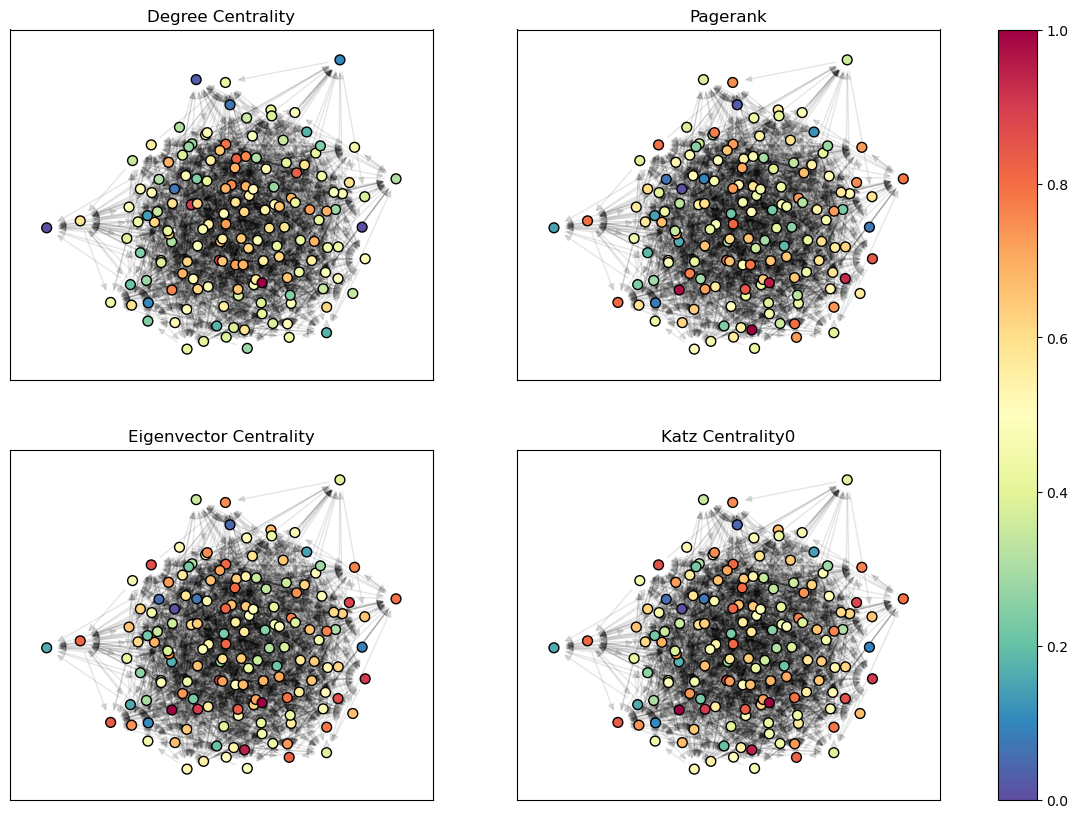

In [8]:
############################################################################
#
#   P l o t   t h e    C e n t r a l i t i e s
#
############################################################################
print("Plotting!")
v_dict, pos = plot_centrality_measures (g0, centrality_measures0,
                                        vertex_color_opacity=1,normalize=True,
                                        max_iter=max_iter,edge_alpha=edge_alpha,add_colorbar=True)

Note that with fast gnp graphs the strong correlation of degree centrality with pagerank vanishes.

What the correlation matrix above is doing under the hood: `v_dict[Centrality_Measure]` gives
the array of centrality scores for
the vertices in the graph.

In [435]:
scipy.stats.pearsonr(v_dict["Katz Centrality0"],v_dict["Eigenvector Centrality"])

PearsonRResult(statistic=0.9999999884487877, pvalue=0.0)

In [436]:
scipy.stats.pearsonr(v_dict["Pagerank"],v_dict["Eigenvector Centrality"])

PearsonRResult(statistic=0.5613047112674572, pvalue=7.923923762561927e-14)

These numbers were gotten using the `random_geometric_graph` example above.

Note the correlation statistic is scale-independent.  The value these two measures assign
individual vertices are quite
different, yet they correlate strongly.

In [437]:
v_dict["Katz Centrality0"][0],v_dict["Eigenvector Centrality"][0]

(1.996599635169408e+55, 0.012553066292950792)

## Kleinberg's HITS algorithm

The HITS algorithm begins with the observation that there are two kinds of
important pages on the World Wide Web, the kind that
are link **targets** for a lot of important 
pages, and the kind that are link **sources** for a lot of important pages.  The first
kind of important page is called an **authority**.  The second kind of important
page is called a **hub**.

The `networkx` module includes an implementation of Kleinberg's HITS
algorithm.  What the algorithm does is to assign two scores to each node in a network, a hub score and an
authority score. So two score dictionaries are returned called `h` and `a` in the code below.

h {0: 0.06819809878131655, 1: 0.23400714018800914, 2: 0.15323973697392732, 3: 0.2918021309387015, 4: 0.12288872770420022, 5: 0.12986416541384518}
a {0: 0.12986416541384513, 1: 0.12288872770420026, 2: 0.2918021309387015, 3: 0.15323973697392732, 4: 0.23400714018800922, 5: 0.06819809878131654}


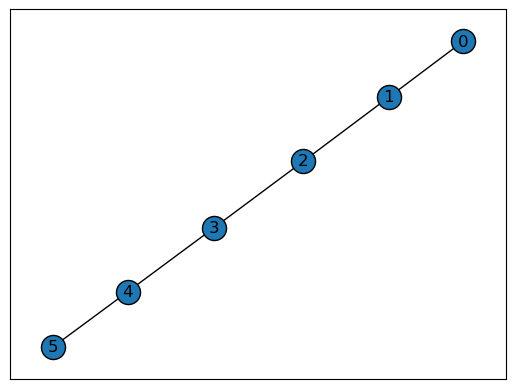

In [327]:

import networkx as nx
import matplotlib.pyplot as plt

G0=nx.path_graph(6)
#G0=nx.path_graph(5)
h,a=nx.hits(G0,max_iter=100)
print ('h', h)
print ('a', a)


# Draw graph with some customization, Fruhcterman-Reingold layout
pos = nx.drawing.fruchterman_reingold_layout(G0)
coll=nx.draw_networkx_nodes(G0,pos)
coll.set_edgecolor("k")
## dd is label dict: Label nodes with their numerical ids.
dd = dict(zip(G0.nodes(),G0.nodes()))
nx.draw_networkx_labels(G0,pos, dd)
nx.draw_networkx_edges(G0,pos)
plt.show()
 


Notice that in this particular example there is a very simple relation between the hub scores and the authority scores. 

$$
h(i) = a(N-1-i)
$$

where $N=5$, the number of nodes.

This is because the path graph we passed in was an undirected graph.  Since the hub/authority distinction makes no sense for an undirected graph, the first thing `nx.hits` does is to change the graph into a directed graph by replacing each undirected edge with two directed edges.  If there was an undirected edge between two nodes $n_1$ and $n_2$, it was replaced with a directed edge fron $n_1$ to $n_2$ and another from $n_2$ to $n_1$.  In this way the hub and authority properties of each node exactly balanced, and each node ended up with its hub score equal to its authority score. 

In terms of what the numbers actually **mean**, that's a longer story, but notice that the hub scores add up to 1, as do the authority scores.  So you can think of a node's authority score as representing the proportion of the total *authority  mass* in the network that that node owns, and similarly for its hub score.

Note also that those scores are different for different nodes.  In part that's due to how connected they are; node 1 is connected to two nodes, 0 and 2, so it has better scores than  node 0, which is connected to only one node.  But it's more subtle than that.  Note that node 2 has better scores than node 1, even though both are connected to two nodes.  That's because node 2's connections are more important than node 1's connections. Node 2 is connected to those well-connected nodes, 1 and 3, while node 1 is connected to one well-connected node, node 2,
and one loser, node 0.  So the score a node gets depends on the hub/authority status of its neighbors, which in turn depend on the hub authority properties of their neighbors, and so on.

HITS is actually a bit more specific about what makes good hubs and good authorities.  The following assumptions
lead directly to the equations used to compute the HITS scores:

 1. Good authorities are pointed to by good hubs.
 2. Good hubs point to good authorities.

Let's try again and this time let's be sure to make a graph where the incoming and outgoing edges do different things,
which is what the algorithm is intended to handle.


### Checking the equations

h [0.38250287 0.07265292 0.14802509 0.24879403 0.14802509]
a [-0.          0.3869908   0.26344623  0.18994086  0.1596221 ]


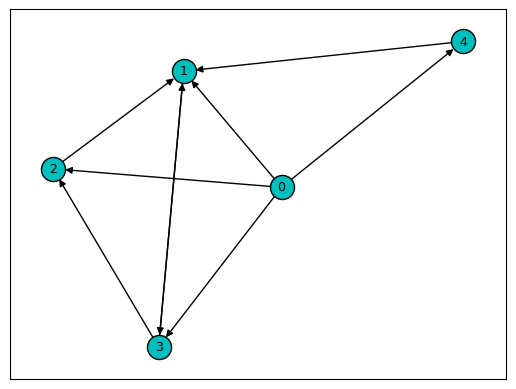

In [281]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Make node 0 a hub, 1 an authority
edgelist = [(0,1),(0,2),(0,3),(0,4),(2,1),(3,1),(4,1)]
G0.add_edges_from(edgelist)

# Gets HITS centralities
h,a=nx.hits(G0)
# Convert the dictionary into an array
h_arr = np.array([h[i] for i in range(len(G0))])
a_arr = np.array([a[i] for i in range(len(G0))])
print ('h', h_arr)
print ('a', a_arr)

# Draw!
seed = 42
pos = nx.drawing.fruchterman_reingold_layout(G0,seed=seed)
colls=nx.draw_networkx_nodes(G0,pos,node_color='c')
colls.set_edgecolor('black')
# Choosing the custom drawing route.
# Need to pass in a node label dict to get labels
dd = dict(zip(G0.nodes(),G0.nodes()))
nx.draw_networkx_labels(G0,pos, dd,font_size=9)
nx.draw_networkx_edges(G0,pos)
plt.show()
 

Clearly, vertex 1 is a much better hub than any other vertex. And clearly 0 is a much better
authority.  And the `h` and `a` scores reflect this.

Note also that vertex 0 has a low authority score (0), because no node points to it.  Conversely, node 1 has a 
low hub score (0), because it points to nothing.  Meanwhile, nodes 2, 3, and 4 have identical scores because their hub/authority situations are identical: Each points to the same great authority (node 1) and is pointed to by the same great hub (node 0).

Let's check whether the implementation respects equations in (7.24) p.180 of Newman.

In [224]:
import numpy as np
A0 = nx.to_numpy_array(G0)

# Hub scores come from the leading eigenvector of the cocitation network
(cocit_vals,cocit_vecs) = np.linalg.eig(A0@(A0.T))
## Authority scores come from the leading eigenvector of the bibliographic coupling network 
(bib_vals,bib_vecs) = np.linalg.eig((A0.T)@A0)

First eigenval is leader.

In [225]:
bib_vals

array([5.30277564e+00, 1.69722436e+00, 6.28687657e-18, 3.00888257e-16,
       0.00000000e+00])

So authority values come from the first column of `bib_vecs`

In [226]:
bib_arr = bib_vecs[:,0]
bib_arr

array([ 0.        , -0.79917148, -0.34704704, -0.34704704, -0.34704704])

We want to compare this with what `nx.hits` gave us as the authority centralities vector.

In [227]:
a_arr

array([-0.        ,  0.43425855,  0.18858048,  0.18858048,  0.18858048])

Showing that `bib_arr` is a rescaling of `a_arr`.

In [228]:
(bib_arr[1]/a_arr[1])* a_arr

array([ 0.        , -0.79917148, -0.34704704, -0.34704704, -0.34704704])

Now let's check Eq. 7.26, p. 180, which provides the easy to compute `a_arr` once given `h_arr`.

In [230]:
a_arr0 = A0.T@h_arr
# demonstrating the right relation between h and a vals (Eq. 7.26, p. 180)
print(a_arr)
print((a_arr[1]/a_arr0[1])*a_arr0)



[-0.          0.43425855  0.18858048  0.18858048  0.18858048]
[0.         0.43425855 0.18858048 0.18858048 0.18858048]


#### Klein HITS Exercise

Here's a new graph and its hub and authority scores.  Answer some questions about how those scores turned out. A note for those not using to reading Python numbers in scientific notation.  Just think of the numbers with `e-09` in them as very small numbers, pretty much equal to 0.

h {1: -6.718224765727068e-17, 3: 0.6180339887498949, 2: 0.38196601125010515}
a {1: 0.6180339887498949, 3: -1.0870316015007696e-16, 2: 0.38196601125010526}


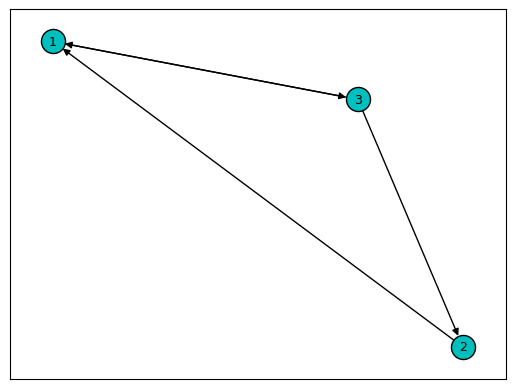

In [280]:
G0=nx.DiGraph()
# Make node 0 a hub,
G0.add_edge(1,3)
G0.add_edge(2,1)
G0.add_edge(3,1)
G0.add_edge(3,2)
h,a=nx.hits(G0)
print ('h', h)
print ('a', a)
# Draw!
pos = nx.drawing.fruchterman_reingold_layout(G0)
dd = dict(zip(G0.nodes(),G0.nodes()))
colls = nx.draw_networkx_nodes(G0, pos, dd, node_color='c')
colls.set_edgecolor('black')
nx.draw_networkx_labels(G0,pos, dd,font_size=9)
nx.draw_networkx_edges(G0,pos)
plt.show()
 

### Questions



   1. Nodes  2 and 3 have indegree 1.  Why is node 3's authority score so small relative to node 2's 
    authority  score?
   2.  Nodes 1 and 2 both have outdegree 1.  Why is node 1's hub score so small relative to node 2's hub score?

### Now a more fun  example

In [120]:
# transparency of edges [lower = more transparent]
alpha, scale=1.0, .3
cmap=plt.cm.Spectral_r

Plotting!


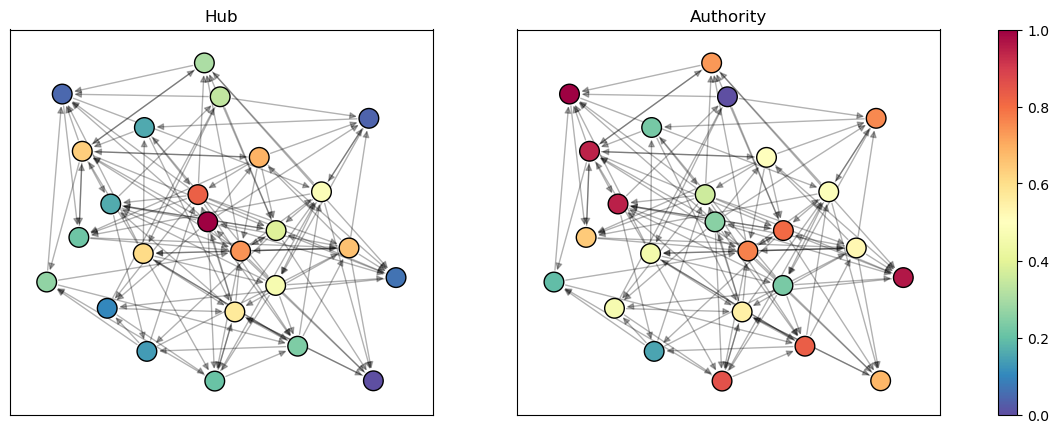

In [68]:
import random
seed,node_size, k_fac  = 47, 200, .5
random.seed(seed)
directed=True

def top_n_vals(arr,top_n_ind):
    return arr[top_n_indices(arr,top_n_ind)]

def top_n_indices(arr,top_n_ind):
    return arr.argsort()[-top_n_ind:]

# This is an interesting but undirected graph
#g0 = nx.duplication_divergence_graph(N, .5, seed)
g0 = nx.fast_gnp_random_graph(25, .2, directed = directed)
A0 = nx.to_numpy_array(g0)
max_iter = 100,
edge_alpha = .3
# optimal distance between nodes increase  to spread nodes out
k = k_fac/np.sqrt(len(g0))
#h,a=nx.hits(G0)
print("Plotting!")
v_dict, pos = plot_centrality_measures (g0, [nx.hits],
                                        vertex_color_opacity=1,normalize=True,
                                        max_iter=max_iter,edge_alpha=edge_alpha,add_colorbar=True)

The Max and Min color values are 1.0 and 0.0. For this color map, Violet (V) = 0, Red (R) = 1.0. 
Ordering: VIBGYOR.

The picture clearly shows the defining property of HITS. Nodes with high outdegree generally make good hubs; nodes with high indegree generally make good authorities.

Here are the Authority centralities:

In [65]:
v_dict['Authority']

array([0.2237349 , 0.85714282, 0.94272575, 0.83110163, 0.48472469,
       0.15136888, 0.1934946 , 0.54885663, 0.        , 0.681602  ,
       0.49242379, 0.22829591, 0.75533023, 0.73271032, 0.76932396,
       0.94762491, 0.52436451, 0.96261553, 1.        , 0.46336548,
       0.25219786, 0.45267214, 0.8052522 , 0.6433688 , 0.35719464])

This is why there are several red vertices in the Authority picture

In [66]:
top_n_vals(v_dict['Authority'],4)

array([0.94272575, 0.94762491, 0.96261553, 1.        ])

This is why there's only one red vertex in the Hub picture.

In [67]:
top_n_vals(v_dict['Hub'],4)

array([0.69059466, 0.74100642, 0.82630599, 1.        ])

In [141]:
max_a_vertex = top_n_indices(v_dict['Authority'],1)[0]
max_a_vertex

18

Finding the indegree of the maximally authoritative vertex.

In [143]:
# Sum columns for indegree
indegs =A0.sum(axis=0)
indegs[max_a_vertex]

7.0

In this particular graph, the max authority vertex is not the same as the max indegree vertex.

In [142]:
indegs.argmax() == max_a_vertex

False